In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
mall=pd.read_csv('Mall_Customers.csv')

In [3]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


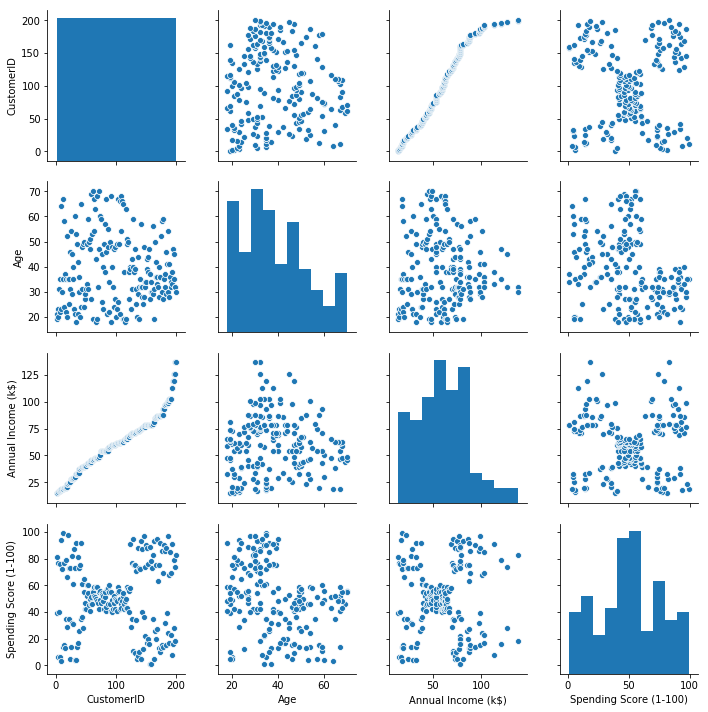

In [4]:
sns.pairplot(mall)

In [4]:
x=mall.iloc[:,[3,4]]
y=mall.iloc[:,[2,3,4]]

In [5]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
mall.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
ks=range(1,15)
wcss=[]
for k in ks:
    #Define the model
    model=KMeans(n_clusters=k)
    #Fit the model
    model.fit(x)#Fitting the model only to 3rd and 4th columns
    wcss.append(model.inertia_)

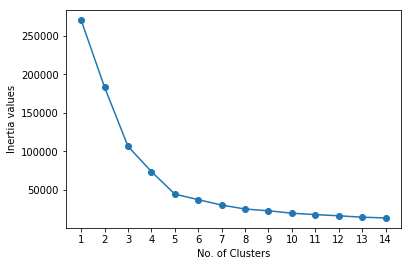

In [9]:
#Plot the results to find the elbow
plt.plot(ks,wcss,"-o")
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [32]:
#Now fittinf the model taking the no. of clusters as 5
model=KMeans(n_clusters=5,random_state=42)
model.fit(x)
labels=model.predict(x)
labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [29]:
centroids=model.cluster_centers_

In [30]:
centroids

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

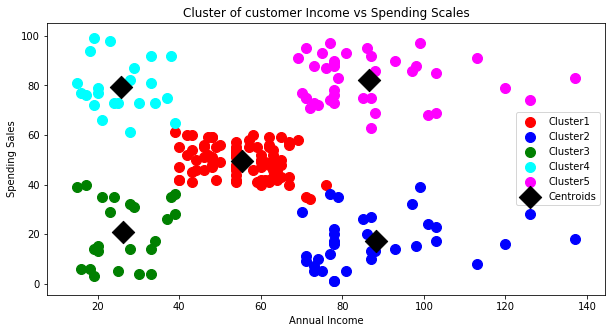

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(x[labels==0].iloc[:,0],x[labels==0].iloc[:,1],s=100,c='red',label='Cluster1')
plt.scatter(x[labels==1].iloc[:,0],x[labels==1].iloc[:,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[labels==2].iloc[:,0],x[labels==2].iloc[:,1],s=100,c='green',label='Cluster3')
plt.scatter(x[labels==3].iloc[:,0],x[labels==3].iloc[:,1],s=100,c='cyan',label='Cluster4')
plt.scatter(x[labels==4].iloc[:,0],x[labels==4].iloc[:,1],s=100,c='magenta',label='Cluster5')
plt.scatter(centroids[:,0],centroids[:,1],s=250,c='black',marker='D',label='Centroids')
plt.title('Cluster of customer Income vs Spending Scales')
plt.xlabel('Annual Income')
plt.ylabel('Spending Sales')
plt.legend()
plt.show()

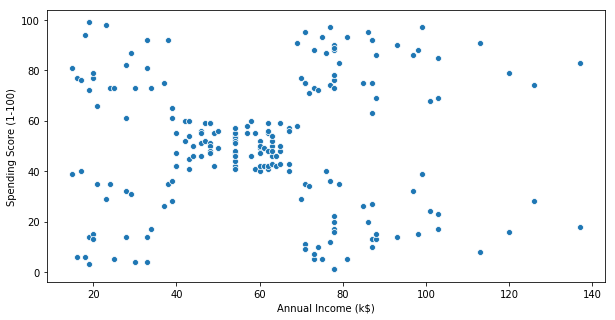

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=mall.iloc[:,3],y=mall.iloc[:,4])

# Hierarchial Clustering

## Dendrogram of the Customer data

In [71]:
import scipy.cluster.hierarchy as sch

In [74]:
sch.linkage(x,method='ward')# Ward minimizes the wcss

array([[ 65.        ,  68.        ,   0.        ,   2.        ],
       [ 48.        ,  49.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 21.        ,  23.        ,   1.        ,   2.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 79.        ,  82.        ,   1.        ,   2.        ],
       [ 74.        ,  85.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 75.        ,  81.        ,   1.        ,   2.        ],
       [ 92.        ,  97.        ,   1.        ,   2.        ],
       [101.        , 109.        ,   1.        ,   2.        ],
       [107.        , 113

Text(0, 0.5, 'Distance Measure')

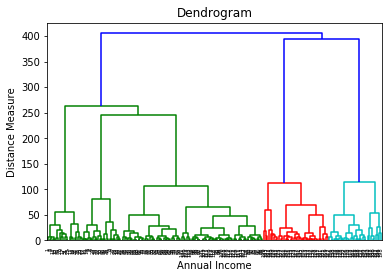

In [81]:
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Annual Income')
plt.ylabel('Distance Measure')

Text(0, 0.5, 'Distance Measure')

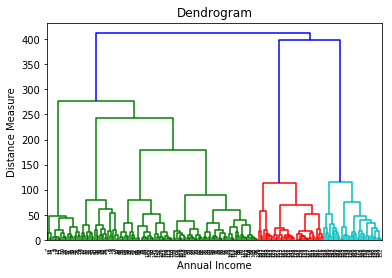

In [82]:
dendrogram=sch.dendrogram(sch.linkage(y,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Annual Income')
plt.ylabel('Distance Measure')

In [83]:
from sklearn.cluster import AgglomerativeClustering

In [84]:
model_h=AgglomerativeClustering(n_clusters=5,linkage='ward')

In [85]:
model_h

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [87]:
labels_h=model_h.fit_predict(x)

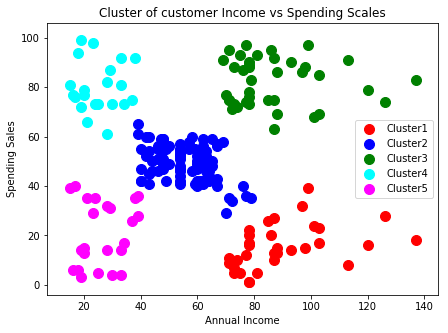

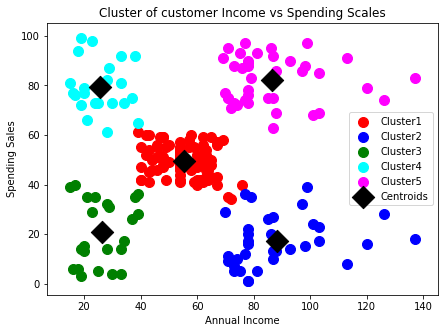

In [92]:
plt.figure(figsize=(7,5))
plt.scatter(x[labels_h==0].iloc[:,0],x[labels_h==0].iloc[:,1],s=100,c='red',label='Cluster1')
plt.scatter(x[labels_h==1].iloc[:,0],x[labels_h==1].iloc[:,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[labels_h==2].iloc[:,0],x[labels_h==2].iloc[:,1],s=100,c='green',label='Cluster3')
plt.scatter(x[labels_h==3].iloc[:,0],x[labels_h==3].iloc[:,1],s=100,c='cyan',label='Cluster4')
plt.scatter(x[labels_h==4].iloc[:,0],x[labels_h==4].iloc[:,1],s=100,c='magenta',label='Cluster5')
plt.title('Cluster of customer Income vs Spending Scales')
plt.xlabel('Annual Income')
plt.ylabel('Spending Sales')
plt.legend()
plt.show()
#KMeans Clustering
plt.figure(figsize=(7,5))
plt.scatter(x[labels==0].iloc[:,0],x[labels==0].iloc[:,1],s=100,c='red',label='Cluster1')
plt.scatter(x[labels==1].iloc[:,0],x[labels==1].iloc[:,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[labels==2].iloc[:,0],x[labels==2].iloc[:,1],s=100,c='green',label='Cluster3')
plt.scatter(x[labels==3].iloc[:,0],x[labels==3].iloc[:,1],s=100,c='cyan',label='Cluster4')
plt.scatter(x[labels==4].iloc[:,0],x[labels==4].iloc[:,1],s=100,c='magenta',label='Cluster5')
plt.scatter(centroids[:,0],centroids[:,1],s=250,c='black',marker='D',label='Centroids')
plt.title('Cluster of customer Income vs Spending Scales')
plt.xlabel('Annual Income')
plt.ylabel('Spending Sales')
plt.legend()
plt.show()

# Wine Dataset

In [162]:
wi=pd.read_csv('winequality-red.csv')
wi.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [163]:
wi.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

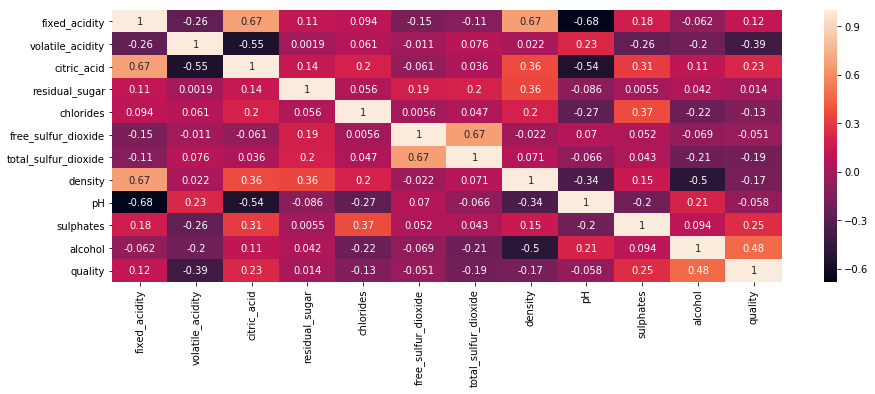

In [164]:
cor=wi.corr()
plt.figure(figsize=(15,5))
sns.heatmap(cor,annot=True)

In [165]:
ks=range(1,15)
wcss=[]

In [166]:
for k in ks:
    km=KMeans(n_clusters=k)
    km.fit(wi)
    wcss.append(km.inertia_)

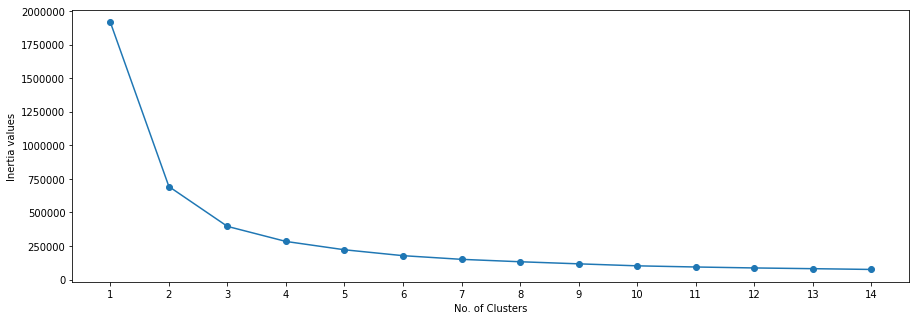

In [167]:
#Plot the results to find the elbow
plt.figure(figsize=(15,5))
plt.plot(ks,wcss,"-o")
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

Text(0.5, 1.0, 'Dendrogram')

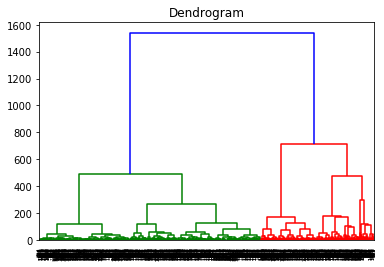

In [168]:
dendrogram=sch.dendrogram(sch.linkage(wi,method='ward'))
plt.title('Dendrogram')

In [169]:
#Now fittinf the model taking the no. of clusters as 5
model=KMeans(n_clusters=4,random_state=42)
model.fit(wi)
labels=model.predict(wi)

In [170]:
centroids=model.cluster_centers_

In [171]:
wi_h=AgglomerativeClustering(n_clusters=4,linkage='ward')

In [172]:
labels_wi=model_h.fit_predict(wi)
np.unique(labels_wi)

array([0, 1, 2, 3, 4], dtype=int64)

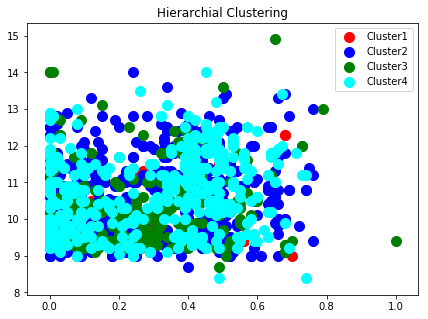

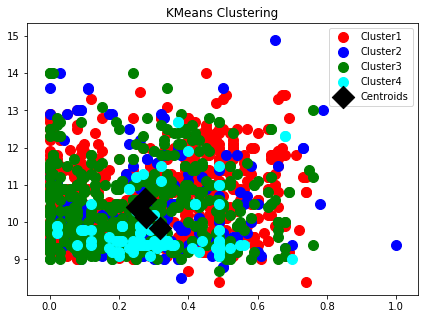

In [173]:
plt.figure(figsize=(7,5))
plt.scatter(wi[labels_wi==0].iloc[:,2],wi[labels_wi==0].iloc[:,10],s=100,c='red',label='Cluster1')
plt.scatter(wi[labels_wi==1].iloc[:,2],wi[labels_wi==1].iloc[:,10],s=100,c='blue',label='Cluster2')
plt.scatter(wi[labels_wi==2].iloc[:,2],wi[labels_wi==2].iloc[:,10],s=100,c='green',label='Cluster3')
plt.scatter(wi[labels_wi==3].iloc[:,2],wi[labels_wi==3].iloc[:,10],s=100,c='cyan',label='Cluster4')
plt.title('Hierarchial Clustering')
plt.legend()
plt.show()
#KMeans Clustering
plt.figure(figsize=(7,5))
plt.scatter(wi[labels==0].iloc[:,2],wi[labels==0].iloc[:,10],s=100,c='red',label='Cluster1')
plt.scatter(wi[labels==1].iloc[:,2],wi[labels==1].iloc[:,10],s=100,c='blue',label='Cluster2')
plt.scatter(wi[labels==2].iloc[:,2],wi[labels==2].iloc[:,10],s=100,c='green',label='Cluster3')
plt.scatter(wi[labels==3].iloc[:,2],wi[labels==3].iloc[:,10],s=100,c='cyan',label='Cluster4')
plt.scatter(centroids[:,2],centroids[:,10],s=250,c='black',marker='D',label='Centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

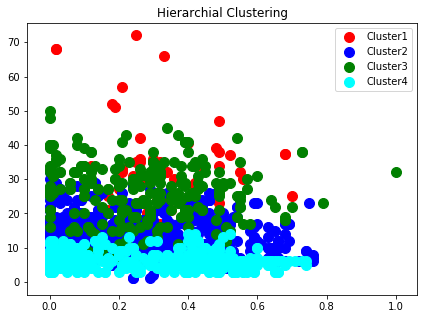

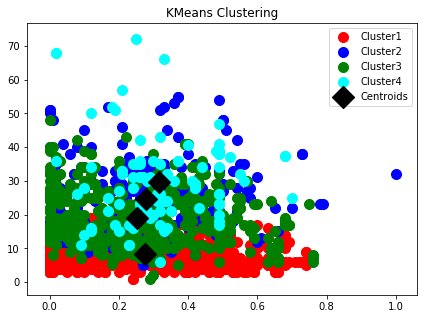

In [174]:
plt.figure(figsize=(7,5))
plt.scatter(wi[labels_wi==0].iloc[:,2],wi[labels_wi==0].iloc[:,5],s=100,c='red',label='Cluster1')
plt.scatter(wi[labels_wi==1].iloc[:,2],wi[labels_wi==1].iloc[:,5],s=100,c='blue',label='Cluster2')
plt.scatter(wi[labels_wi==2].iloc[:,2],wi[labels_wi==2].iloc[:,5],s=100,c='green',label='Cluster3')
plt.scatter(wi[labels_wi==3].iloc[:,2],wi[labels_wi==3].iloc[:,5],s=100,c='cyan',label='Cluster4')
plt.title('Hierarchial Clustering')
plt.legend()
plt.show()
#KMeans Clustering
plt.figure(figsize=(7,5))
plt.scatter(wi[labels==0].iloc[:,2],wi[labels==0].iloc[:,5],s=100,c='red',label='Cluster1')
plt.scatter(wi[labels==1].iloc[:,2],wi[labels==1].iloc[:,5],s=100,c='blue',label='Cluster2')
plt.scatter(wi[labels==2].iloc[:,2],wi[labels==2].iloc[:,5],s=100,c='green',label='Cluster3')
plt.scatter(wi[labels==3].iloc[:,2],wi[labels==3].iloc[:,5],s=100,c='cyan',label='Cluster4')
plt.scatter(centroids[:,2],centroids[:,5],s=250,c='black',marker='D',label='Centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

# Diabetes Dataset

In [175]:
dia=pd.read_csv('diabetes.csv')

In [176]:
dia.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [177]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [178]:
ks=range(1,10)
wcss=[]

In [179]:
for k in ks:
    km=KMeans(n_clusters=k)
    km.fit(dia)
    wcss.append(km.inertia_)

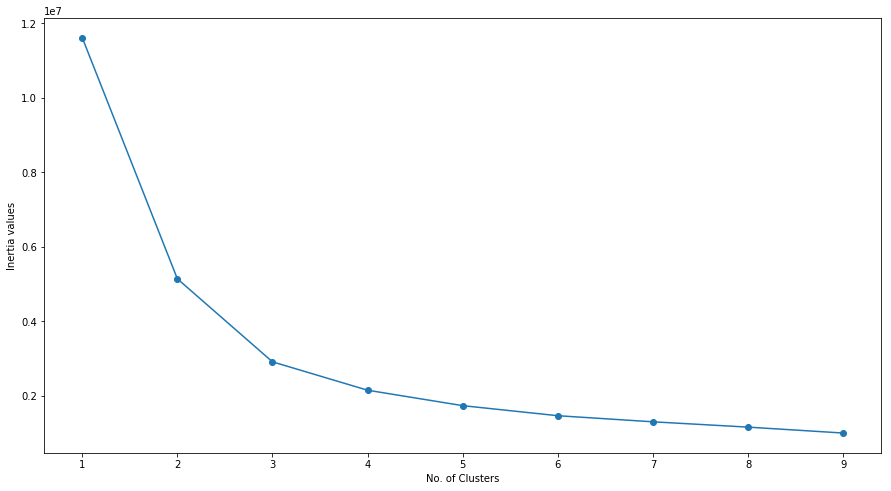

In [180]:
#Plot the results to find the elbow
plt.figure(figsize=(15,8))
plt.plot(ks,wcss,"-o")
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

Text(0.5, 1.0, 'Dendrogram')

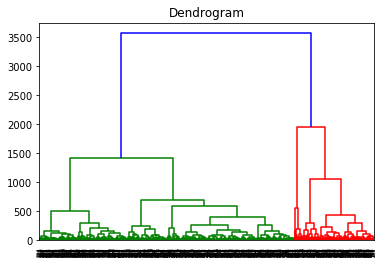

In [181]:
dendrogram=sch.dendrogram(sch.linkage(dia,method='ward'))
plt.title('Dendrogram')

In [198]:
#Now fittinf the model taking the no. of clusters as 5
model=KMeans(n_clusters=3,random_state=42)
model.fit(dia)
labels=model.predict(dia)
np.unique(labels)

array([0, 1, 2])

In [183]:
centroids=model.cluster_centers_

In [184]:
dia_h=AgglomerativeClustering(n_clusters=3,linkage='ward')

In [185]:
labels_dia=model_h.fit_predict(dia)
np.unique(labels_dia)

array([0, 1, 2, 3, 4], dtype=int64)

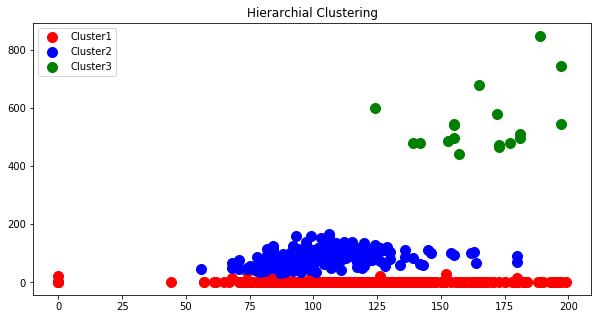

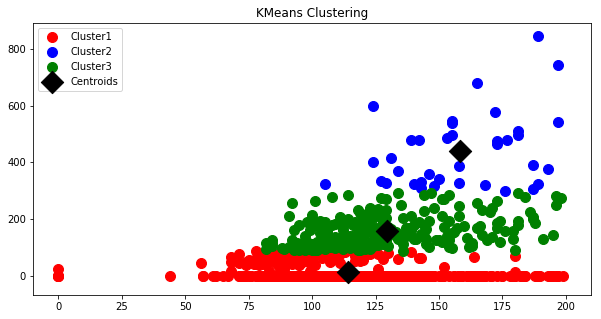

In [193]:
#Hierarchial Clustering
plt.figure(figsize=(10,5))
plt.scatter(dia[labels_dia==0].iloc[:,1],dia[labels_dia==0].iloc[:,4],s=100,c='red',label='Cluster1')
plt.scatter(dia[labels_dia==1].iloc[:,1],dia[labels_dia==1].iloc[:,4],s=100,c='blue',label='Cluster2')
plt.scatter(dia[labels_dia==2].iloc[:,1],dia[labels_dia==2].iloc[:,4],s=100,c='green',label='Cluster3')

plt.title('Hierarchial Clustering')
plt.legend()
plt.show()
#KMeans Clustering
plt.figure(figsize=(10,5))
plt.scatter(dia[labels==0].iloc[:,1],dia[labels==0].iloc[:,4],s=100,c='red',label='Cluster1')
plt.scatter(dia[labels==1].iloc[:,1],dia[labels==1].iloc[:,4],s=100,c='blue',label='Cluster2')
plt.scatter(dia[labels==2].iloc[:,1],dia[labels==2].iloc[:,4],s=100,c='green',label='Cluster3')
plt.scatter(centroids[:,1],centroids[:,4],s=250,c='black',marker='D',label='Centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

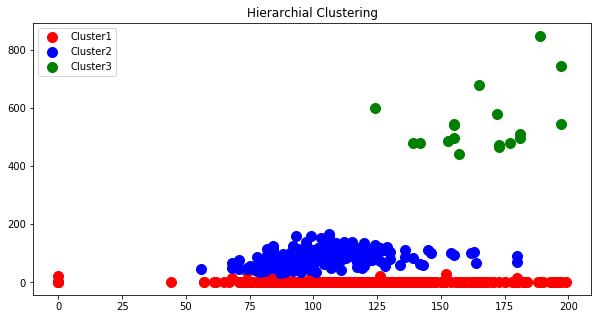

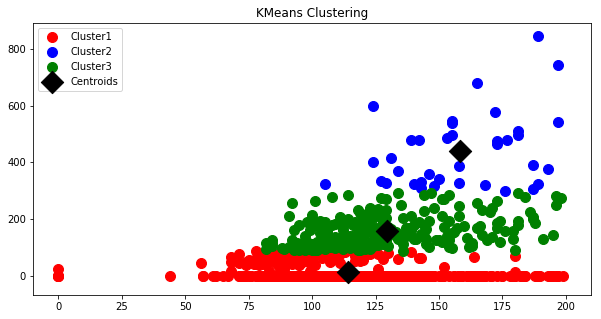

In [195]:
#Hierarchial Clustering
plt.figure(figsize=(10,5))
plt.scatter(dia[labels_dia==0].iloc[:,1],dia[labels_dia==0].iloc[:,4],s=100,c='red',label='Cluster1')
plt.scatter(dia[labels_dia==1].iloc[:,1],dia[labels_dia==1].iloc[:,4],s=100,c='blue',label='Cluster2')
plt.scatter(dia[labels_dia==2].iloc[:,1],dia[labels_dia==2].iloc[:,4],s=100,c='green',label='Cluster3')
plt.title('Hierarchial Clustering')
plt.legend()
plt.show()
#KMeans Clustering
plt.figure(figsize=(10,5))
plt.scatter(dia[labels==0].iloc[:,1],dia[labels==0].iloc[:,4],s=100,c='red',label='Cluster1')
plt.scatter(dia[labels==1].iloc[:,1],dia[labels==1].iloc[:,4],s=100,c='blue',label='Cluster2')
plt.scatter(dia[labels==2].iloc[:,1],dia[labels==2].iloc[:,4],s=100,c='green',label='Cluster3')
plt.scatter(centroids[:,1],centroids[:,4],s=250,c='black',marker='D',label='Centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [199]:
#Dendrogram
from scipy.cluster.hierarchy import dendrogram

In [203]:
z=sch.linkage(dia.drop('Outcome',axis=1),method='complete')

Text(0, 0.5, 'Distance Measure')

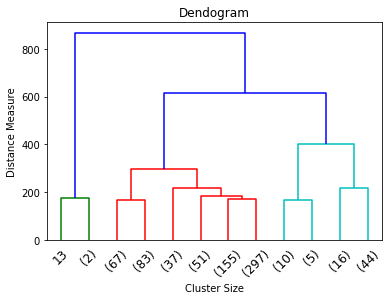

In [204]:
dendrogram=sch.dendrogram(z,orientation='top',truncate_mode='lastp',p=12,leaf_rotation=45)
plt.title('Dendogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance Measure')

In [205]:
z=sch.linkage(dia.drop('Outcome',axis=1),method='single')

Text(0, 0.5, 'Distance Measure')

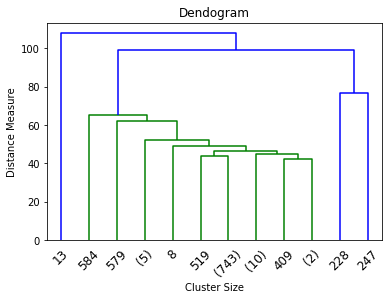

In [206]:
dendrogram=sch.dendrogram(z,orientation='top',truncate_mode='lastp',p=12,leaf_rotation=45)
plt.title('Dendogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance Measure')

Text(0, 0.5, 'Distance Measure')

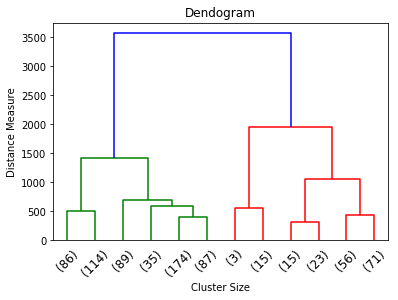

In [208]:
z=sch.linkage(dia.drop('Outcome',axis=1),method='ward')#ward=offering less wcss value
dendrogram=sch.dendrogram(z,orientation='top',truncate_mode='lastp',p=12,leaf_rotation=45)
plt.title('Dendogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance Measure')

Text(0, 0.5, 'Distance Measure')

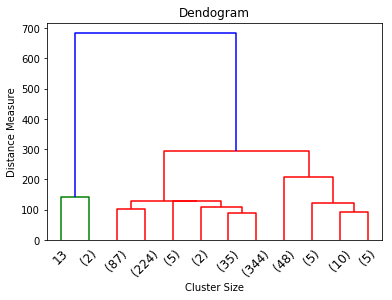

In [209]:
z=sch.linkage(dia.drop('Outcome',axis=1),method='average')
dendrogram=sch.dendrogram(z,orientation='top',truncate_mode='lastp',p=12,leaf_rotation=45)
plt.title('Dendogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance Measure')